# Plotting CUES and GOES data

Make an example plot of ground-based CUES observations of downward longwave radiation, snow-surface temperature, and sun/no-sun flag against GOES ~11 micron band brightness temperature observations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

---
## Open data files

Open the CUES temperature data files, and concatenate them together

In [2]:
cues_temp_files = [ r'.\CUES_data\2017-03-01-2017-03-31-Temperature-CUES.csv',
                   r'.\CUES_data\2017-04-01-2017-04-15-Temperature-CUES.csv',
                   r'.\CUES_data\2017-04-16-2017-04-30-Temperature-CUES.csv'
                  ]

cues_temp_data = []
_ = [cues_temp_data.append(pd.read_csv(i)) for i in cues_temp_files]
cues_temp_data = pd.concat(cues_temp_data)

# Convert the 'DateTime' text strings to pandas datetime objects
cues_temp_data['datetime']  = pd.to_datetime(cues_temp_data['MeasDateTime'])

Open the CUES radiation data file

In [3]:
cues_rad_file = r'.\CUES_data\2017-03-01-2017-04-30-Radiation-CUES.csv'
cues_rad_data = pd.read_csv(cues_rad_file)

# Convert the 'DateTime' text strings to pandas datetime objects
cues_rad_data['datetime']  = pd.to_datetime(cues_rad_data['MeasDateTime'])

Load GOES observations for the CUES site

In [4]:
goes = pd.read_pickle('.\GOES_data\goes-output_2017_CUES.pkl')

# Change GOES time values from UTC to UTC-7 for CUES site:
goes['datetime'] = goes['time'] - pd.Timedelta(hours=7)

Load MODIS observations of the CUES site

In [5]:
modis_1 = pd.read_pickle('./MODIS_data/cues_2017_1-59.pkl')
modis_2 = pd.read_pickle('./MODIS_data/cues_2017_60-120.pkl')

# Concatenate the two MODIS time series together
modis = pd.concat([modis_1, modis_2], ignore_index=True)

---
## Make example plot

Set font sizes for plots

In [6]:
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Plot CUES snow surface temperature, CUES downward longwave, GOES 11 micron band brightness temperature

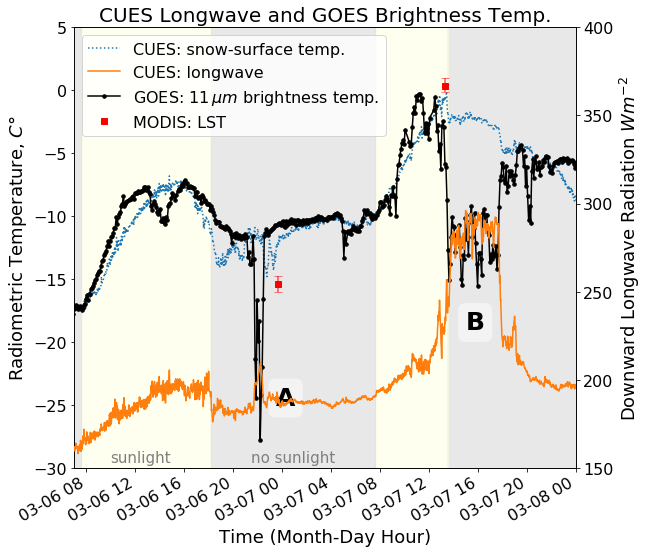

In [21]:
# Set start and end dates for time period we want to look at
startdate = pd.datetime(2017,3,6,7)
enddate = pd.datetime(2017,3,8)

# Plot
fig, ax = plt.subplots(figsize=(9,9))

# Plot CUES snow surface temperature
cues_tss = cues_temp_data.plot(x='datetime',y='snow surface temperature; Apogee SI-111 thermal radiometer; (Celsius)', 
                    c='tab:blue', ax=ax, linestyle=':', legend=False)
cues_tss.set_label('CUES: snow-surface temperature')

# Plot CUES Longwave on a second y-axis
ax2 = ax.twinx()
cues_lw = cues_rad_data.plot(x='datetime',y='upward looking longwave radiation; uplooking Eppley lab precision infrared long wave radiometer; (Watts/meter^2)',
                   c='tab:orange', ax=ax2, linestyle='-', legend=False, zorder=10)
cues_lw.set_label('CUES: longwave')

# Fill in areas CUES identifies as sunny versus not sunny
sun_flag = cues_rad_data['SUN flag; uplooking Sunshine pyranometer  direct and diffuse; (bit)'] == 1
cues_nosun = ax.fill_between(cues_rad_data.datetime, 100, y2=-100, where=~sun_flag, color='lightgrey',alpha=0.5)
cues_sun = ax.fill_between(cues_rad_data.datetime, 100, y2=-100, where=sun_flag, color='lightyellow',alpha=0.5)

# Plot GOES brightness temperature
goes_tb = goes.plot(x='datetime', y='tb', c='k', linestyle='-', marker='.', markersize='7', ax=ax, legend=False)

# Plot MODIS
modis_temp = modis.plot(x='datetime',y='temp_mean', marker='s',c='r',linestyle='None',ax=ax)
# MODIS error bars
ax.errorbar(modis.datetime,modis.temp_mean,
             yerr=[np.abs(modis.temp_min-modis.temp_mean),abs(modis.temp_max-modis.temp_mean)],
             linestyle='None',c='r',linewidth=2,capsize=4,alpha=0.5)

# add labels to points I'll highlight in the figure caption (periods of ehanced longwave due to cloud cover)
textbox = dict(boxstyle='round', edgecolor='none', facecolor='white', alpha=0.5)
ax.text(pd.datetime(2017,3,6,23,30),-25,'A',size=25,weight ='bold', bbox=textbox) # A - a little cloud
ax.text(pd.datetime(2017,3,7,15),-19,'B',size=25,weight ='bold',bbox=textbox) # B - more substatial clouds
# text labels for sun/no sun flag
ax.text(pd.datetime(2017,3,6,10),-29.5,'sunlight',size=15,color='tab:gray') # sunlight flag
ax.text(pd.datetime(2017,3,6,21,30),-29.5,'no sunlight',size=15,color='tab:gray') # no sunlight flag

# format axes
ax.set_xlim([startdate,enddate])
ax.set_ylim([-30,5])
ax.set_ylabel('Radiometric Temperature, $C\degree$')
ax2.set_ylabel('Downward Longwave Radiation $W m^{-2}$')
ax2.set_ylim([150,400])
ax.set_xlabel('Time (Month-Day Hour)')

# make legend
lines = [ax.lines[0], ax2.lines[0], ax.lines[1], ax.lines[2]]
labels = ['CUES: snow-surface temp.', 'CUES: longwave', 'GOES: $11\,\mu m$ brightness temp.','MODIS: LST']
ax.legend(lines, labels, loc='upper left')

# set title
plt.title('CUES Longwave and GOES Brightness Temp.');

plt.savefig('longwave-vs-tb.jpg',dip=200);

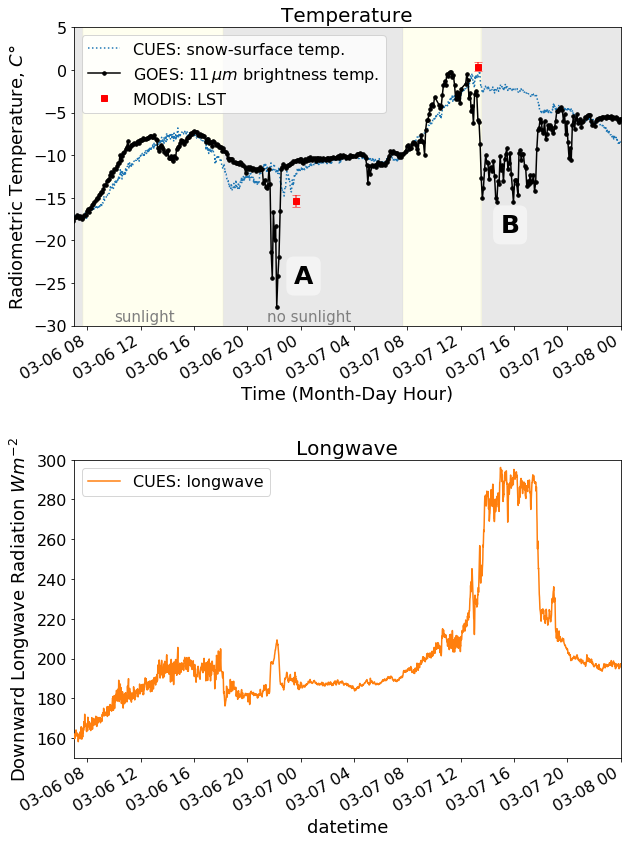

In [25]:
# Set start and end dates for time period we want to look at
startdate = pd.datetime(2017,3,6,7)
enddate = pd.datetime(2017,3,8)

# Plot
fig, ax = plt.subplots(2,1,figsize=(9,12))

# Plot CUES snow surface temperature
cues_tss = cues_temp_data.plot(x='datetime',y='snow surface temperature; Apogee SI-111 thermal radiometer; (Celsius)', 
                    c='tab:blue', ax=ax[0], linestyle=':', legend=False)
cues_tss.set_label('CUES: snow-surface temperature')

# Plot CUES Longwave on a second y-axis
#ax2 = ax.twinx()
cues_lw = cues_rad_data.plot(x='datetime',y='upward looking longwave radiation; uplooking Eppley lab precision infrared long wave radiometer; (Watts/meter^2)',
                   c='tab:orange', ax=ax[1], linestyle='-', legend=False, zorder=10)
cues_lw.set_label('CUES: longwave')

# Fill in areas CUES identifies as sunny versus not sunny
sun_flag = cues_rad_data['SUN flag; uplooking Sunshine pyranometer  direct and diffuse; (bit)'] == 1
cues_nosun = ax[0].fill_between(cues_rad_data.datetime, 100, y2=-100, where=~sun_flag, color='lightgrey',alpha=0.5)
cues_sun = ax[0].fill_between(cues_rad_data.datetime, 100, y2=-100, where=sun_flag, color='lightyellow',alpha=0.5)

# Plot GOES brightness temperature
goes_tb = goes.plot(x='datetime', y='tb', c='k', linestyle='-', marker='.', markersize='7', ax=ax[0], legend=False)

# Plot MODIS
modis_temp = modis.plot(x='datetime',y='temp_mean', marker='s',c='r',linestyle='None',ax=ax[0])
# MODIS error bars
ax[0].errorbar(modis.datetime,modis.temp_mean,
             yerr=[np.abs(modis.temp_min-modis.temp_mean),abs(modis.temp_max-modis.temp_mean)],
             linestyle='None',c='r',linewidth=2,capsize=4,alpha=0.5)

# add labels to points I'll highlight in the figure caption (periods of ehanced longwave due to cloud cover)
textbox = dict(boxstyle='round', edgecolor='none', facecolor='white', alpha=0.5)
ax[0].text(pd.datetime(2017,3,6,23,30),-25,'A',size=25,weight ='bold', bbox=textbox) # A - a little cloud
ax[0].text(pd.datetime(2017,3,7,15),-19,'B',size=25,weight ='bold',bbox=textbox) # B - more substatial clouds
# text labels for sun/no sun flag
ax[0].text(pd.datetime(2017,3,6,10),-29.5,'sunlight',size=15,color='tab:gray') # sunlight flag
ax[0].text(pd.datetime(2017,3,6,21,30),-29.5,'no sunlight',size=15,color='tab:gray') # no sunlight flag

# format axes
ax[0].set_xlim([startdate,enddate])
ax[1].set_xlim([startdate,enddate])
ax[0].set_ylim([-30,5])
ax[0].set_ylabel('Radiometric Temperature, $C\degree$')
ax[1].set_ylabel('Downward Longwave Radiation $W m^{-2}$')
ax[1].set_ylim([150,300])
ax[0].set_xlabel('Time (Month-Day Hour)')

# make legend
lines = [ax[0].lines[0], ax[0].lines[1], ax[0].lines[2]]
lines_2 = [ax[1].lines[0]]
labels = ['CUES: snow-surface temp.', 'GOES: $11\,\mu m$ brightness temp.','MODIS: LST']
labels_2=['CUES: longwave']
ax[0].legend(lines, labels, loc='upper left')
ax[1].legend(lines_2, labels_2, loc='upper left')

# set title
ax[0].set_title('Temperature');
ax[1].set_title('Longwave');
plt.tight_layout()

plt.savefig('longwave-vs-tb_2.jpg',dip=200);